#Self Organizing Map

##Install MiniSom Package

In [1]:
%pip install MiniSom

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Aleem\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


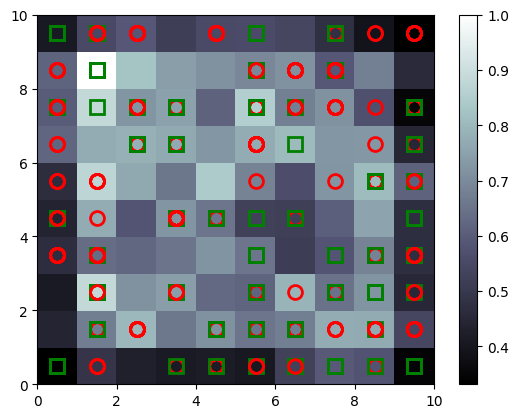

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
# mappings = som.win_map(X)
# frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
# frauds = sc.inverse_transform(frauds)

# Find the fraudulent customers
mappings = som.win_map(X)
dist_map = som.distance_map()
frauds = []
for i in range(len(X)):
    # Find the winning neuron for the current input vector
    w = som.winner(X[i])
    # Check if the neuron is close to a fraudulent customer
    if dist_map[w[0], w[1]] > 0.8:
        frauds.append(np.concatenate((mappings[w[0], w[1]], [i])))
# Convert the fraudulent customers back to the original scale
frauds = sc.inverse_transform(np.array(frauds))

##Printing the Fraud Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15686461
15680643
15692137
15668830
15712877
15573520
15676909
15647898
15679801
15788215
15726466
15692408
15694530
15667451
15763108
15730287
15728906
15736510
15708236
15686670
15736420
15624850
15765093
15737542
15615176
15656417
15748691
15748986
15727811
15665590
